## Movement in 2D - Random walk

 A random walk is a mathematical concept that describes a path consisting of a series of random steps. It is a fundamental model used in various fields, including physics, biology, finance, and computer science, to study processes where randomness plays a significant role.

A two-dimensional random walk extends the concept of a random walk from a one-dimensional line to a two-dimensional plane. In this scenario, instead of moving only left or right along a line, the entity can move in any direction within the plane.

At each step of the two-dimensional random walk, the entity randomly chooses both a horizontal and a vertical direction to move. These directions are typically determined independently and with equal probability. Mathematically, if $(x_n​,y_n​)$ represents the position of the entity after $n$ steps, the new position $(x_{n+1}​,y_{n+1}​)$ can be calculated as:
\begin{align}
x_{n+1}=x_n+\xi_x \\
y_{n+1}​=y_n​+\xi_y \\
\end{align}

where $\xi_x$ and $\xi_y$ are random variables representing the changes in the horizontal and vertical directions, respectively.

One of the key features of random walks is their tendency to exhibit certain statistical properties over time, such as diffusion-like behavior and convergence to a probability distribution. These properties make random walks a powerful tool for modeling and understanding stochastic processes and systems.


Here is an example for such a random walk:

![Random_walk_url](https://upload.wikimedia.org/wikipedia/commons/c/c2/Brownian_motion_large.gif)

### Exercises:

1.1 Define the time vector for the intervall [0,10] and $\Delta t = 0.01$.

1.2 Write a function that calculates and returns the position of a single particle for each time step. Where $\xi_x$ and  $\xi_y$ are drawn from a normal distribution with mean $0$ and variance $ \Delta t$.

1.3 Calculate the random walk in the time intervall defined in 1.1. 

1.4 Plot the path of the particle in a suitable way.

1.5 Run your simulation for 5 times and plot all the paths together. What do you notice?

1.6 Plotting the paths is quite nice, but this could be better. Try to animate your results. Hint: Have a look at the Animations in the Plots section.

1.7 Think of a metric to characterize the behaviour of the particle. Calculate and plot this metric.

1.8 Change the parameter values and analyse how this affects your results.


In [33]:
import numpy as np 
import matplotlib.pyplot as plt
T = 10
N = 100
dt = (T/N)

t = np.linspace(0,T,N)


In [21]:
def random_step(x_n,y_n,dt):
    x_n_1 = x_n + np.random.normal(0,dt)
    y_n_1 = y_n + np.random.normal(0,dt)
    return x_n_1,y_n_1

In [26]:
def random_walk(dt,N, x_0=0, y_0=0):
    x = np.zeros(N)
    y = np.zeros(N)
    x[0] = x_0
    y[0] = y_0
    for i in range(N-1):
        x[i+1], y[i+1]= random_step(x[i],y[i],dt)
    return x,y

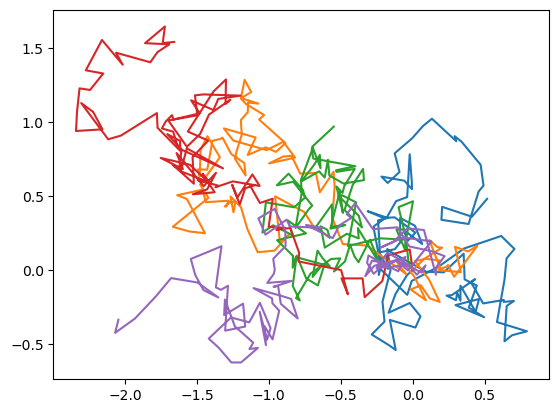

In [27]:
for i in range(5):
    x,y = random_walk(dt,N)
    plt.plot(x,y)

In [45]:
r = np.linalg.norm(np.array([x,y]),axis = 0)
len(r)

100

In [41]:
import matplotlib.animation
from IPython.display import HTML
fig , ax = plt.subplots()
x,y = random_walk(dt,N)

colors = plt.cm.jet(np.linspace(0,1,N))
r = np.norm(np.array([x,y]),axis = 0)
color_dist = plt.cm.jet(np.linspace(0,,N))
def animate_hist(t, color = "time"):
    #clear the previous plot
    #plt.cla()
    # gradually increase the size of the plotted list
    if color == "time":
        plt.plot(x[:t], y[:t], color = colors[t])
    else:
        plt.plot(x[:t], y[:t], color = color)
    plt.plot(x[t-2:t], y[t-2:t], color = colors[t])
    plt.xlim(-2,2)
    plt.ylim(-2,2)
    
    plt.title('animated random walk')
    plt.xlabel('X')
    plt.ylabel('Y')
    
    
ani_hist = matplotlib.animation.FuncAnimation(fig, animate_hist, frames= N, interval = 100)


out_hist = HTML(ani_hist.to_jshtml())

#ani_hist.save("histo.gif")
plt.close()
out_hist